## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
x = np.linspace(0,20)
y = -2*x + 1

In [3]:
X = np.ones((len(x),2))
X[:,1] = x
print(X)

[[ 1.          0.        ]
 [ 1.          0.40816327]
 [ 1.          0.81632653]
 [ 1.          1.2244898 ]
 [ 1.          1.63265306]
 [ 1.          2.04081633]
 [ 1.          2.44897959]
 [ 1.          2.85714286]
 [ 1.          3.26530612]
 [ 1.          3.67346939]
 [ 1.          4.08163265]
 [ 1.          4.48979592]
 [ 1.          4.89795918]
 [ 1.          5.30612245]
 [ 1.          5.71428571]
 [ 1.          6.12244898]
 [ 1.          6.53061224]
 [ 1.          6.93877551]
 [ 1.          7.34693878]
 [ 1.          7.75510204]
 [ 1.          8.16326531]
 [ 1.          8.57142857]
 [ 1.          8.97959184]
 [ 1.          9.3877551 ]
 [ 1.          9.79591837]
 [ 1.         10.20408163]
 [ 1.         10.6122449 ]
 [ 1.         11.02040816]
 [ 1.         11.42857143]
 [ 1.         11.83673469]
 [ 1.         12.24489796]
 [ 1.         12.65306122]
 [ 1.         13.06122449]
 [ 1.         13.46938776]
 [ 1.         13.87755102]
 [ 1.         14.28571429]
 [ 1.         14.69387755]
 

#### Plot your data points. 

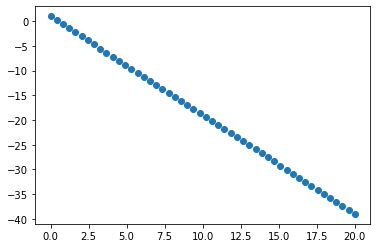

In [4]:
plt.scatter(x,y)
plt.show()

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [10]:
def LR(X, y, batch_size, alpha= 0.001, epochs=1000):
    m = batch_size
    theta = np.zeros((X.shape[1])) 
    theta_values =[[],[]]
    cost_values = []                   
    
    
    for i in range(epochs):
        for j in range(0, X.shape[0],batch_size):
            #load next batch:
            x_b = X[j:j+batch_size, :]
            y_b = y[j:j+batch_size]
            
            hyp = x_b @ theta    #equal to np.dot(X,theta)
            z = hyp -y_b
            cost = np.mean(z**2)/2
            cost_values.append(cost)
            dtheta = (x_b.T @ z)/m
            theta -= alpha*dtheta
            theta_values[0].append(theta[0])
            theta_values[1].append(theta[1])
            
        if np.linalg.norm(dtheta, ord=2) <= 0.01:
            print(f"program stopped at the {i}th epoch")
            break

    print(f"Final Cost={cost_values[-1]}")
    print(f"Final Gradient={np.linalg.norm(dtheta,ord=2)}")
    return theta, cost_values ,theta_values

In [7]:
def plot_cost(cost, x=None):
    if x == None:
        plt.plot(cost)
        plt.title("Cost per iteration")
        plt.xlabel("iterations"), plt.ylabel("Cost")
    else:
        plt.plot(x, cost)
        plt.title("Cost per theta")
        plt.xlabel("theta"), plt.ylabel("Cost")
    plt.grid()
    plt.show()

In [18]:
def plot_lines(x, y, theta_values):
    plt.scatter(x,y, label="Original Data")
    for th0,th1 in zip(theta_values[0],theta_values[1]):
        y_predict = th0 + th1*x
        plt.plot(x, y_predict, "r", alpha=0.4)
        plt.grid()
    plt.legend()
    plt.show()

In [8]:
def plot_best_line(x, y, y_predict):
    plt.scatter(x, y, marker="+", label = "Original Data", alpha=0.7)
    plt.plot(x,y_predict, "r", label = "Predicted Line")
    plt.xlabel("X"), plt.ylabel("y"), plt.title("Predicted vs. Original")
    plt.legend()
    plt.grid()
    plt.show()

In [12]:
theta, cost ,theta_values = LR(X, y, batch_size=len(y), alpha= 0.001, epochs=100)
y_predict = X @ theta

Final Cost=0.15977955407302746
Final Gradient=0.28610949075164965


In [13]:
print("R2 score=", metrics.r2_score(y, y_predict))

R2 score= 0.9976984742382373


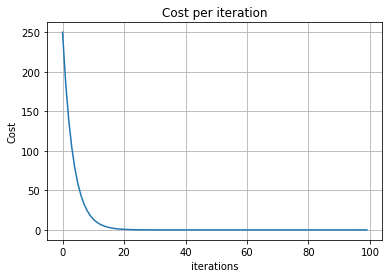

In [14]:
plot_cost(cost)

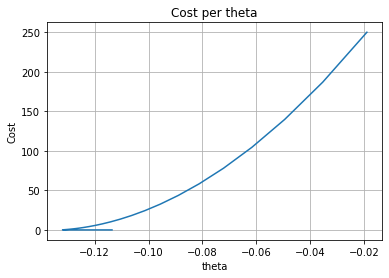

In [15]:
#Cost vs. theta_0:
plot_cost(cost, theta_values[0])

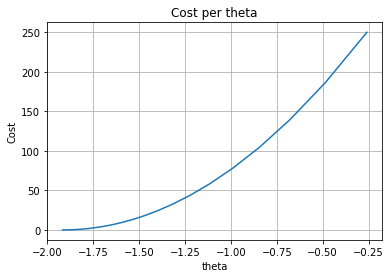

In [16]:
#Cost vs. theta_1:
plot_cost(cost, theta_values[1])

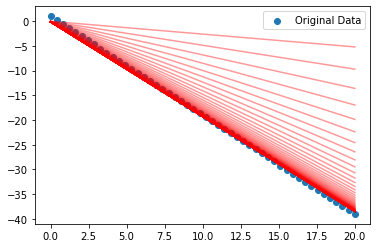

In [19]:
plot_lines(x, y, theta_values)

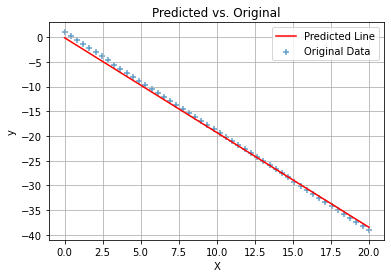

In [17]:
plot_best_line(x, y, y_predict)

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

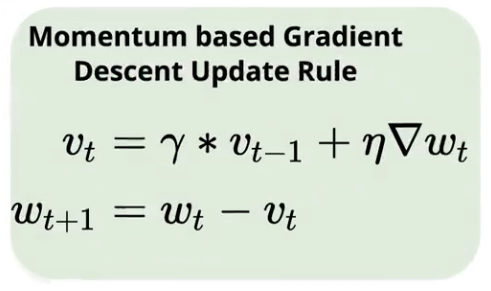

#### γ takes values between 0 and 1.
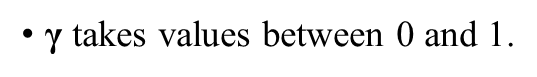

In [24]:
def LR_moment(X, y, batch_size, alpha= 0.001, gamma=0.7, epochs=1000, type="momentum"):
    m = batch_size
    theta = np.zeros((X.shape[1])) 
    theta_values =[[],[]]
    cost_values = []                   
    moment = 0
    
    for i in range(epochs):
        for j in range(0, X.shape[0],batch_size):
            #load next batch:
            x_b = X[j:j+batch_size, :]
            y_b = y[j:j+batch_size]
            
            hyp = x_b @ theta    
            z = hyp -y_b
            cost = np.mean(z**2)/2
            cost_values.append(cost)
            
            if type == "momentum":
                dtheta = (x_b.T @ z)/m
                moment = gamma*moment + alpha*dtheta
                theta -= moment
                
            elif type == "nag":
                theta -= gamma*moment
                hyp = x_b @ theta
                z = hyp -y_b
                dtheta = (x_b.T @ z)/m
                theta -= alpha*dtheta
                moment = gamma*moment + alpha*dtheta
                
                
            theta_values[0].append(theta[0])
            theta_values[1].append(theta[1])
            
        if np.linalg.norm(dtheta, ord=2) <= 0.01:
            print(f"program stopped at the {i}th epoch")
            break

    print(f"Final Cost={cost_values[-1]}")
    print(f"Final Gradient={np.linalg.norm(dtheta,ord=2)}")
    return theta, cost_values ,theta_values

In [34]:
theta, cost ,theta_values = LR_moment(X, y, batch_size=len(y), alpha= 0.001, gamma=0.7, epochs=100, type="momentum")

Final Cost=0.14245921079585977
Final Gradient=0.27015740388958737


R2 score= 0.9979504230337037


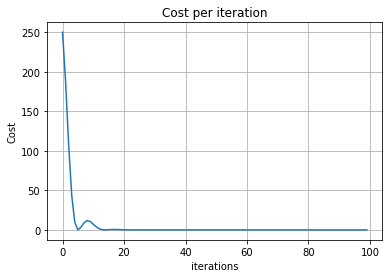

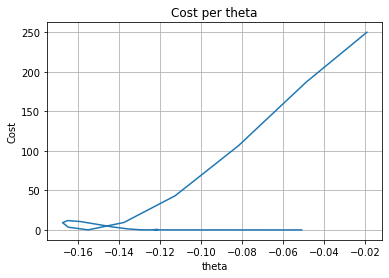

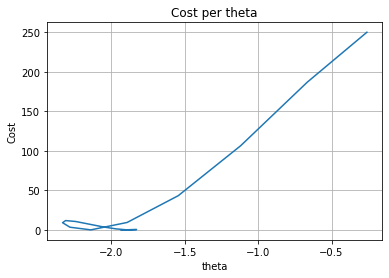

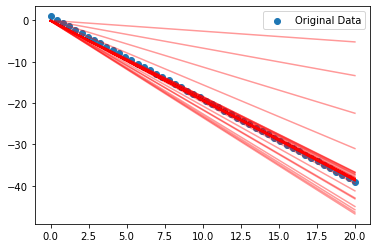

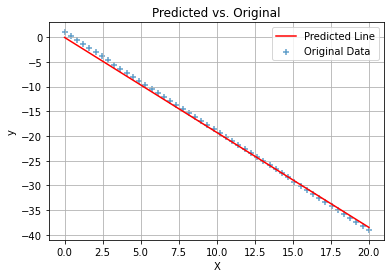

In [35]:
y_predict = X @ theta
print("R2 score=", metrics.r2_score(y, y_predict))
plot_cost(cost)
#Cost vs. theta_0:
plot_cost(cost, theta_values[0])
#Cost vs. theta_1:
plot_cost(cost, theta_values[1])
plot_lines(x, y, theta_values)
plot_best_line(x, y, y_predict)

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

Final Cost=0.13161095505713782
Final Gradient=0.259687879613028
R2 score= 0.9981081345355358


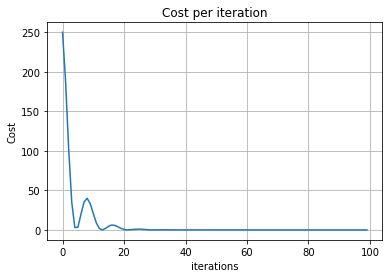

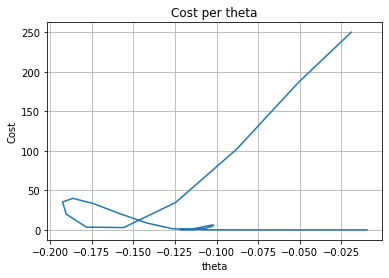

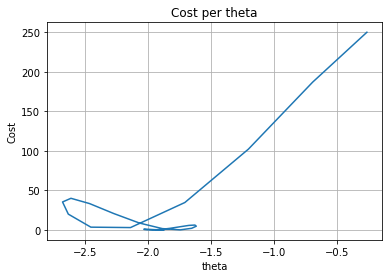

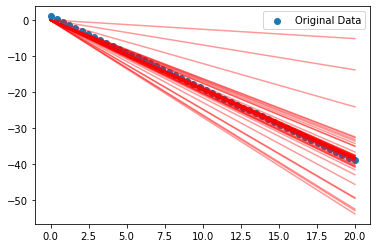

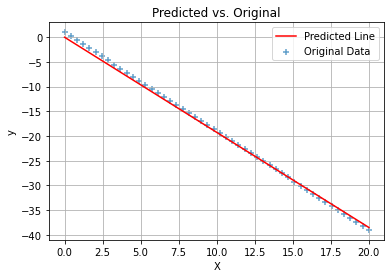

In [33]:
#gamma = 0.8
theta, cost ,theta_values = LR_moment(X, y, batch_size=len(y), alpha= 0.001, gamma=0.8, epochs=100, type="momentum")
y_predict = X @ theta
print("R2 score=", metrics.r2_score(y, y_predict))
plot_cost(cost)
#Cost vs. theta_0:
plot_cost(cost, theta_values[0])
#Cost vs. theta_1:
plot_cost(cost, theta_values[1])
plot_lines(x, y, theta_values)
plot_best_line(x, y, y_predict)

Final Cost=0.11128995219216932
Final Gradient=1.329955084003087
R2 score= 0.9983994623538781


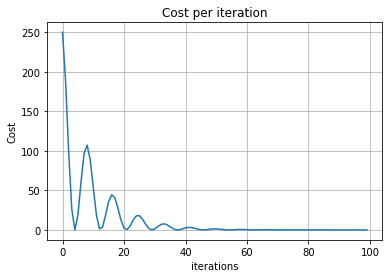

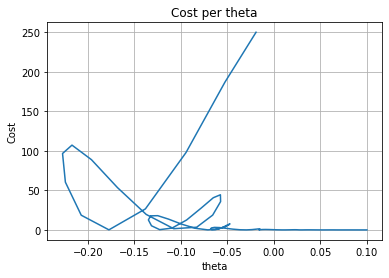

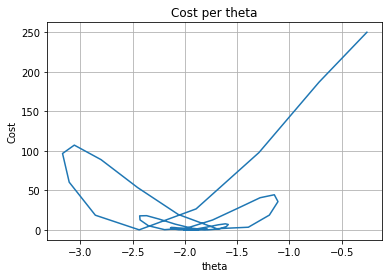

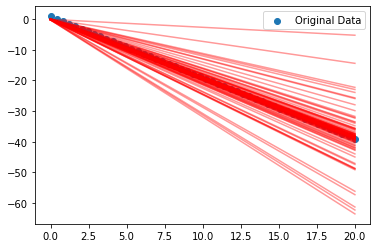

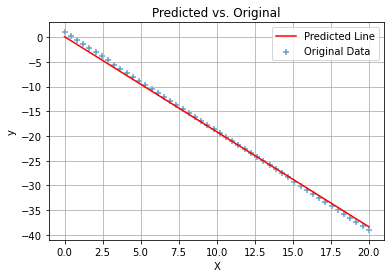

In [37]:
#gamma = 0.9
theta, cost ,theta_values = LR_moment(X, y, batch_size=len(y), alpha= 0.001, gamma=0.9, epochs=100, type="momentum")
y_predict = X @ theta
print("R2 score=", metrics.r2_score(y, y_predict))
plot_cost(cost)
#Cost vs. theta_0:
plot_cost(cost, theta_values[0])
#Cost vs. theta_1:
plot_cost(cost, theta_values[1])
plot_lines(x, y, theta_values)
plot_best_line(x, y, y_predict)

Final Cost=46.700486102840166
Final Gradient=112.461331204422
R2 score= -0.12806086818870566


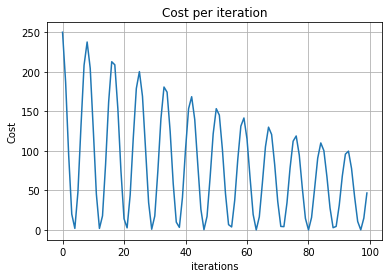

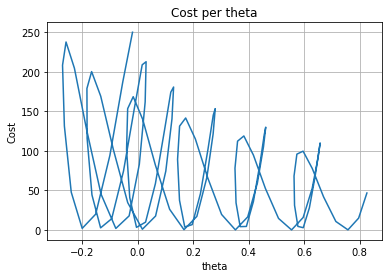

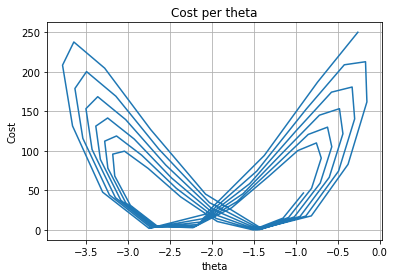

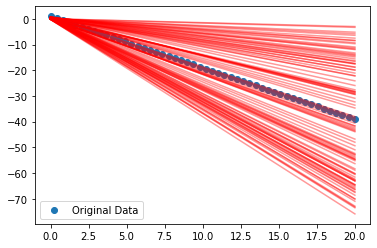

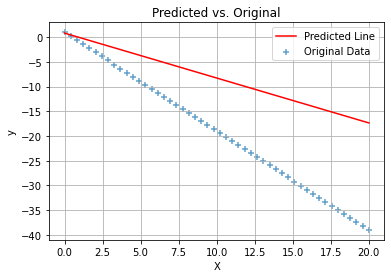

In [38]:
#gamma = 0.99:
theta, cost ,theta_values = LR_moment(X, y, batch_size=len(y), alpha= 0.001, gamma=0.99, epochs=100, type="momentum")
y_predict = X @ theta
print("R2 score=", metrics.r2_score(y, y_predict))
plot_cost(cost)
#Cost vs. theta_0:
plot_cost(cost, theta_values[0])
#Cost vs. theta_1:
plot_cost(cost, theta_values[1])
plot_lines(x, y, theta_values)
plot_best_line(x, y, y_predict)

Final Cost=0.15977955407302746
Final Gradient=0.28610949075164965
R2 score= 0.9976984742382373


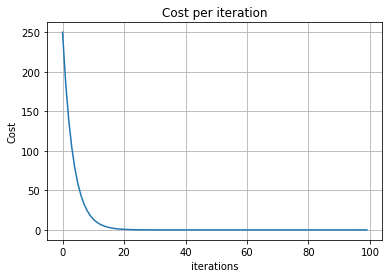

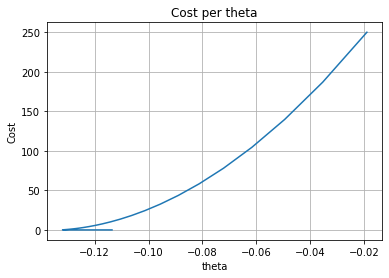

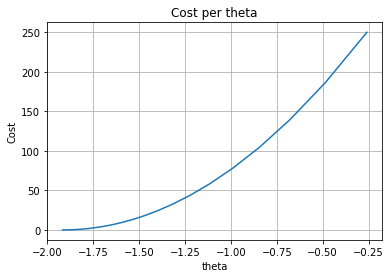

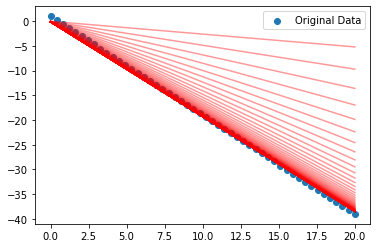

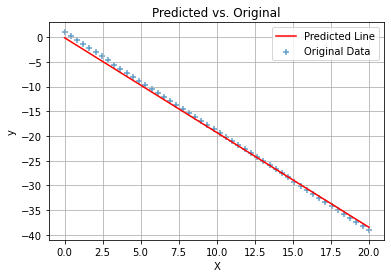

In [39]:
#gamma = 0:
theta, cost ,theta_values = LR_moment(X, y, batch_size=len(y), alpha= 0.001, gamma=0, epochs=100, type="momentum")
y_predict = X @ theta
print("R2 score=", metrics.r2_score(y, y_predict))
plot_cost(cost)
#Cost vs. theta_0:
plot_cost(cost, theta_values[0])
#Cost vs. theta_1:
plot_cost(cost, theta_values[1])
plot_lines(x, y, theta_values)
plot_best_line(x, y, y_predict)

### Update your Batch GD for one variable  implementation to be NAG and check your results

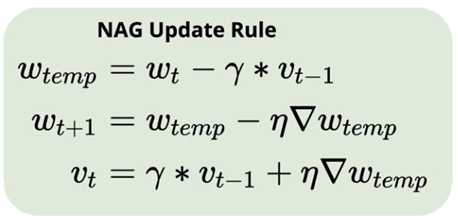

Final Cost=0.14247287659831087
Final Gradient=0.2700085134719235
R2 score= 0.9979502243150277


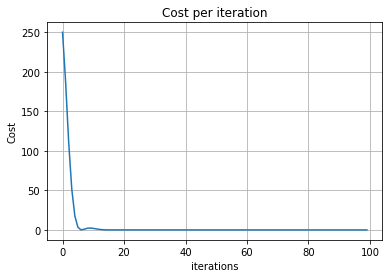

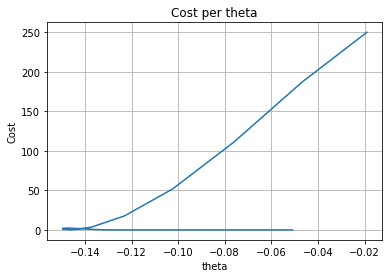

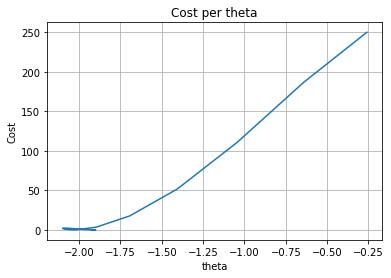

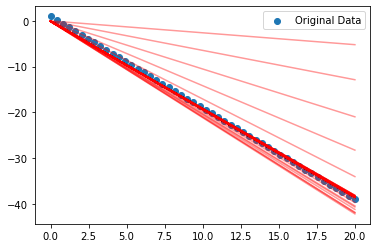

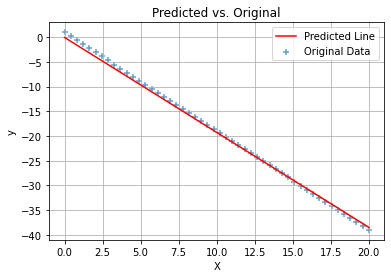

In [40]:
theta, cost ,theta_values = LR_moment(X, y, batch_size=len(y), alpha= 0.001, gamma=0.7, epochs=100, type="nag")
y_predict = X @ theta
print("R2 score=", metrics.r2_score(y, y_predict))
plot_cost(cost)
#Cost vs. theta_0:
plot_cost(cost, theta_values[0])
#Cost vs. theta_1:
plot_cost(cost, theta_values[1])
plot_lines(x, y, theta_values)
plot_best_line(x, y, y_predict)

Final Cost=0.13164251041231634
Final Gradient=0.2594311006918795
R2 score= 0.9981076759982161


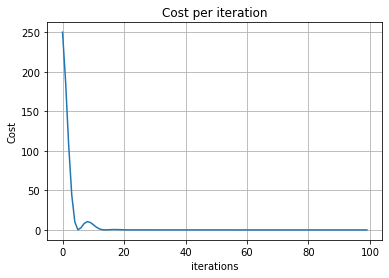

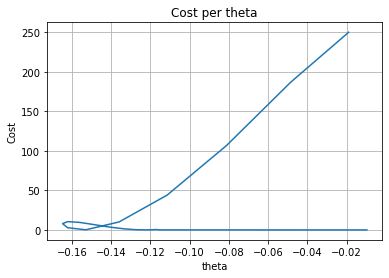

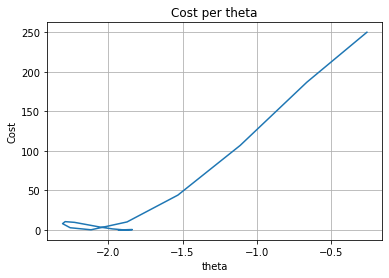

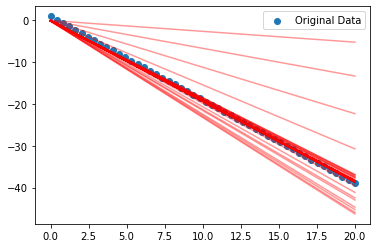

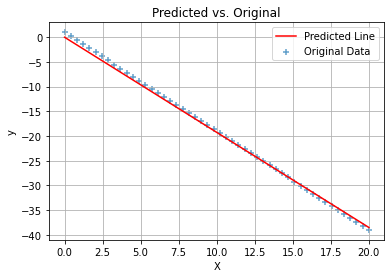

In [41]:
#gamma = 0.8
theta, cost ,theta_values = LR_moment(X, y, batch_size=len(y), alpha= 0.001, gamma=0.8, epochs=100, type="nag")
y_predict = X @ theta
print("R2 score=", metrics.r2_score(y, y_predict))
plot_cost(cost)
#Cost vs. theta_0:
plot_cost(cost, theta_values[0])
#Cost vs. theta_1:
plot_cost(cost, theta_values[1])
plot_lines(x, y, theta_values)
plot_best_line(x, y, y_predict)

Final Cost=0.10506429943933757
Final Gradient=0.23146000655733684
R2 score= 0.9984937535882614


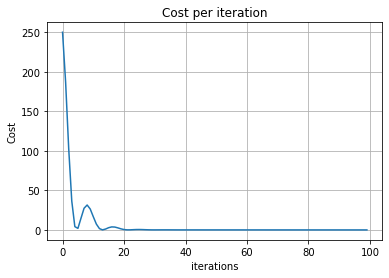

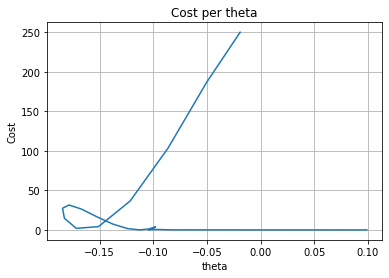

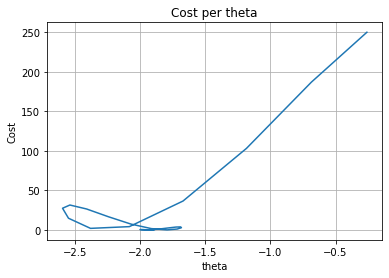

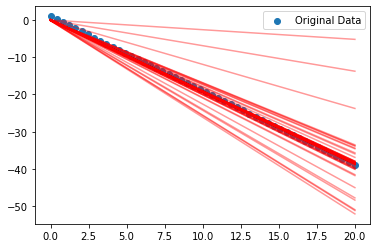

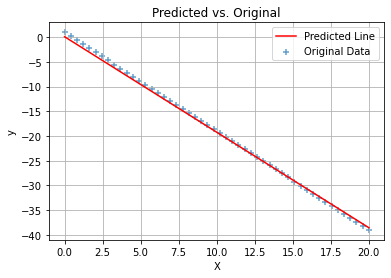

In [42]:
#gamma = 0.9
theta, cost ,theta_values = LR_moment(X, y, batch_size=len(y), alpha= 0.001, gamma=0.9, epochs=100, type="nag")
y_predict = X @ theta
print("R2 score=", metrics.r2_score(y, y_predict))
plot_cost(cost)
#Cost vs. theta_0:
plot_cost(cost, theta_values[0])
#Cost vs. theta_1:
plot_cost(cost, theta_values[1])
plot_lines(x, y, theta_values)
plot_best_line(x, y, y_predict)

## Congratulations 
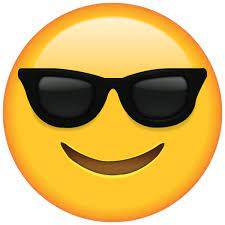